##### Nombre: Pablo César Méndez Rodas
##### Carnet: 22006487
##### Statistical Learning, sección L
##### PAPD - Segundo trimestre 2023

In [544]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [545]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape 

(1460, 81)

### Extraemos columnas con Nan  

In [546]:
#A estas columnas tenemos que hacerle algún tipo de imputación
cols_con_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [547]:
# necesitamos conocer el tipo de datos de cada columna
# si son numeros, la imputacion se hace de una forma y si son string se hace de otra forma
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [548]:
#Buscamos el porcentaje de NaN que tienen cada columna
#Un 5% es el maximo para hacer imputacion, mas de eso no vale la pena.
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()*100
prop_nan_per_col
#De estas columnas, hay 6 que no cumplen con el 5% maximo, hay 5 que se pasan solo un poco por lo que las tomaremos como dentro del maximo.

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### Casos especiales

In [549]:
# LotFrontage es del tipo numerico y tiene menos del 20% de nulos, procederemos a hacer la imputacion y verificar si puede quedarse.
dataHP['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [550]:
media = dataHP['LotFrontage'].mean()
mediana = dataHP['LotFrontage'].median()

print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 70.04995836802665
Mediana: 69.0


In [551]:
dataHP['Front_mean']=np.round(dataHP['LotFrontage'].fillna(media))
dataHP['Front_median']=np.round(dataHP['LotFrontage'].fillna(mediana))

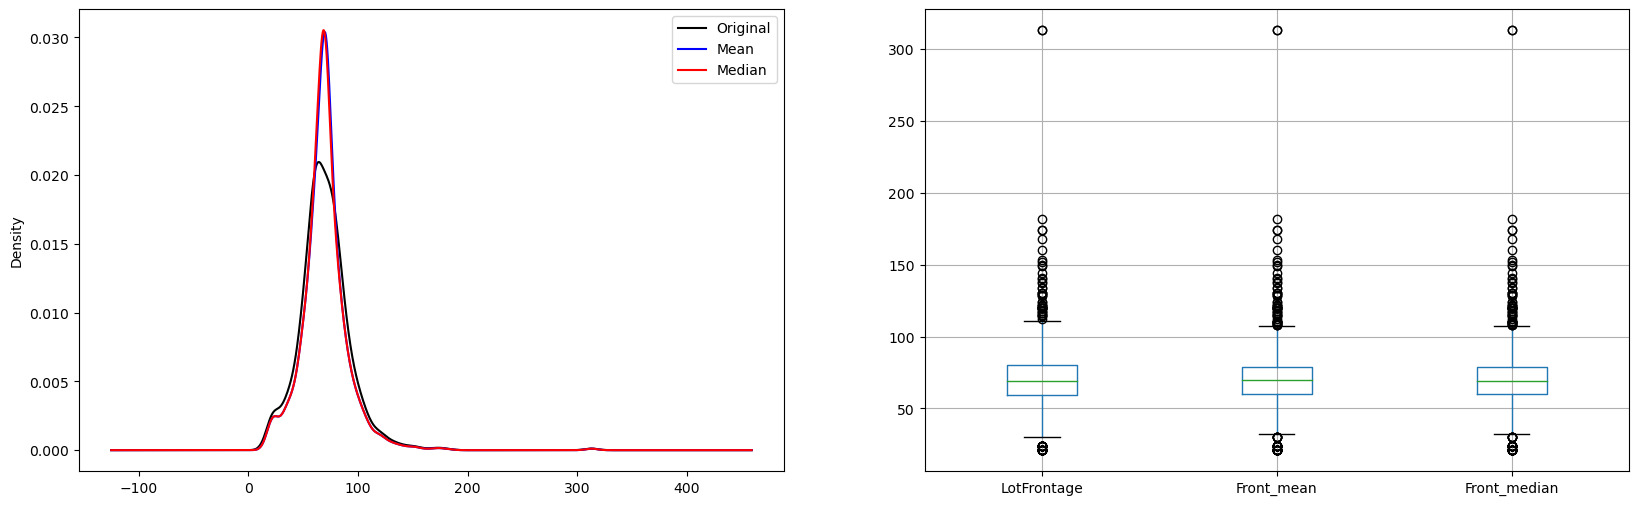

In [552]:
fig = plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
dataHP['LotFrontage'].plot.density(color='black', label='Original')
dataHP['Front_mean'].plot.density(color='blue', label='Mean')
dataHP['Front_median'].plot.density(color='red', label='Median')
plt.legend()

plt.subplot(1,2,2)
dataHP[['LotFrontage','Front_mean','Front_median']].boxplot()
plt.show()

#Observamos que se conserva la tendencia y las boxplot son muy similares, procedemos a rellenar los NaN con la media en LotFrontage

In [553]:
dataHP=dataHP.drop(columns=['Front_mean','Front_median'])
dataHP['LotFrontage'].fillna(media,inplace=True)

In [554]:
cols_con_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()*100
prop_nan_per_col


Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [555]:
#Otro caso especial es PoolQC
print(dataHP['PoolQC'].value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


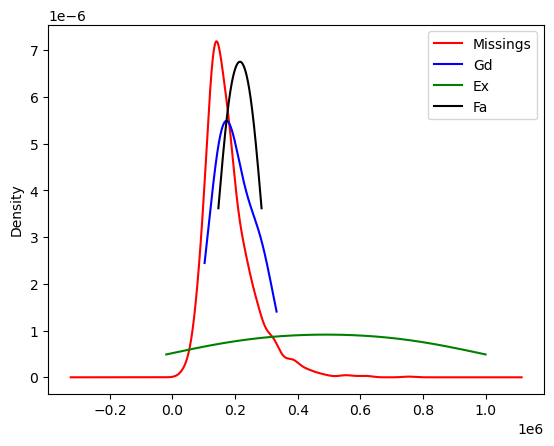

In [556]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP['PoolQC'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP['PoolQC'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP['PoolQC'] == 'Ex']['SalePrice'].plot(kind="kde", color="green", label="Ex")
dataHP[dataHP['PoolQC'] == 'Fa']['SalePrice'].plot(kind="kde", color="black", label="Fa")
ax.legend()
plt.show()

In [557]:
dataHP.loc[:,['PoolQC','SalePrice']].nlargest(20,'SalePrice')
#La intencion inicial era reemplazar todos los NaN con una nueva catergia de "NO" para evitar la eliminacion de la columna
#Observamos que no hay relacion directa de la piscina con SalePrice, y hay muy pocos datos, por lo que se elimina la columna.
#De las 20 casas mas caras, solo una tiene piscina. Yo hubiera esperado que las mas caras tuvieran piscina.

,PoolQC,SalePrice
691,NaN,755000
1182,Ex,745000
1169,NaN,625000
898,NaN,611657
803,NaN,582933
1046,NaN,556581
440,NaN,555000
769,NaN,538000
178,NaN,501837
798,NaN,485000


In [558]:
cols_rescatables = [col for col in dataHP.columns 
                        if( (dataHP[col].isnull().mean()<=0.056))]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ssn

In [559]:
cols_norescatables = [col for col in dataHP.columns 
                        if( (dataHP[col].isnull().mean()>0.056))]
cols_norescatables

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [560]:
#Verificamos la forma que tomaria el dataset
dataHP[cols_rescatables].shape,dataHP.shape


((1460, 76), (1460, 81))

In [561]:
#Realizamos eliminacion de columnas con mayor a 5% de datos faltantes
dataHP=dataHP.drop(columns=cols_norescatables)
dataHP.shape

(1460, 76)

### Imputacion variables numericas

In [562]:
#Encontramos las columnas que cumplen con el limite de 5% NaNs

cols_rescatables_num = [col for col in dataHP.columns 
                        if((dataHP[col].isnull().mean()>0) and 
                           (dataHP[col].isnull().mean()<=0.056)and
                           (dataHP[col].dtypes=='float64'))]
cols_rescatables_num

['MasVnrArea', 'GarageYrBlt']

In [563]:
#Realizamos la imputacion de la misma manera que lo hicimos con LotFrontage reemplazando con la media

-----------MasVnrArea---------
Media: 103.68526170798899
Mediana: 0.0


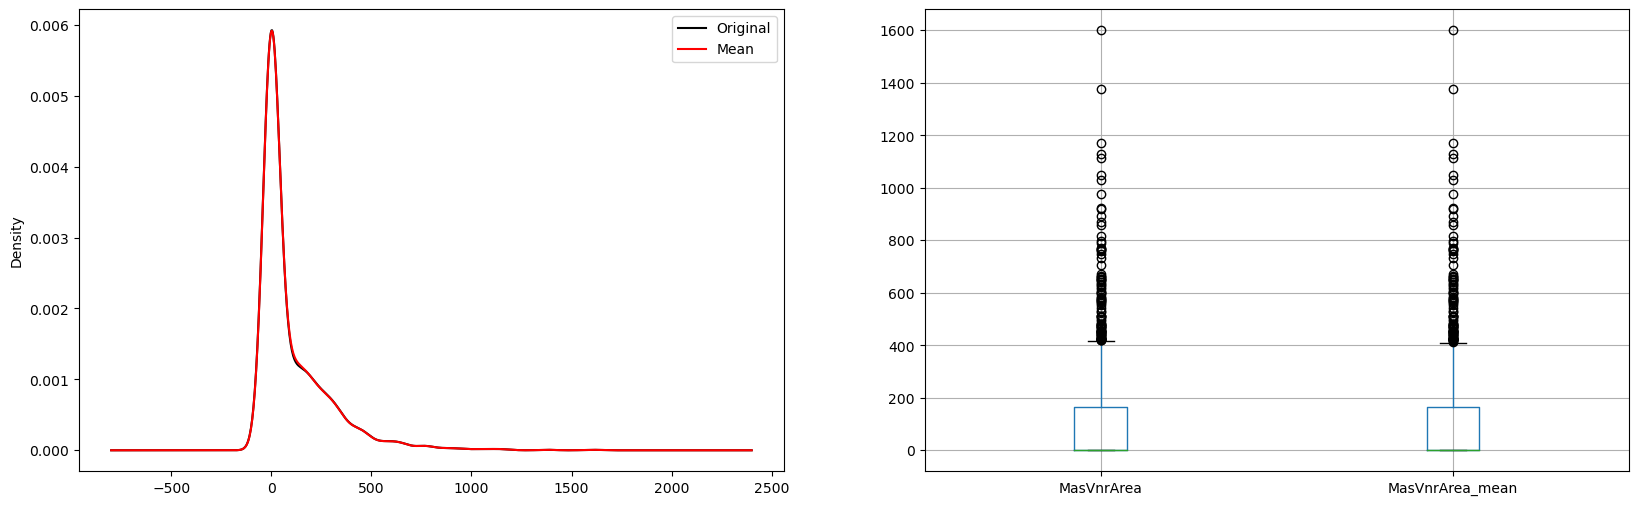

-----------GarageYrBlt---------
Media: 1978.5061638868744
Mediana: 1980.0


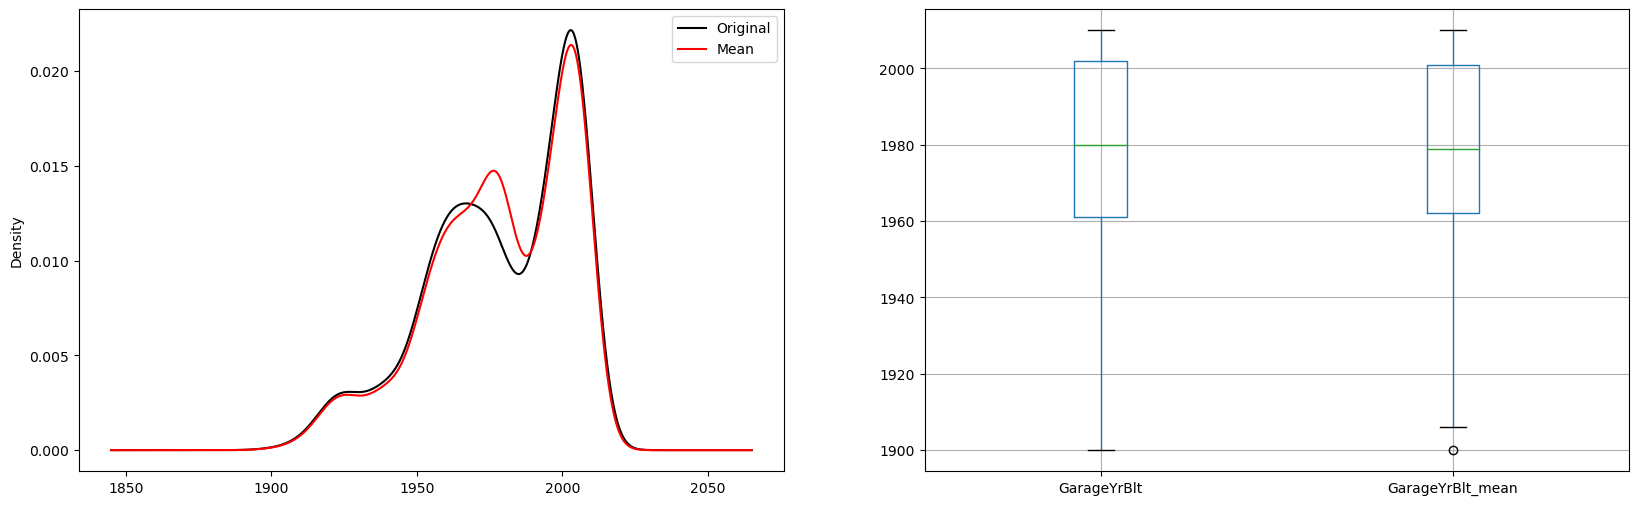

In [564]:
for col in cols_rescatables_num:
    media = dataHP[col].mean()
    mediana = dataHP[col].median()

    print(f'-----------{col}---------')
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")

    col_name= f'{col}_mean'

    dataHP[col_name]=np.round(dataHP[col].fillna(media))

    fig = plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    dataHP[col].plot.density(color='black', label='Original')
    dataHP[col_name].plot.density(color='red', label='Mean')
    plt.legend()

    plt.subplot(1,2,2)
    dataHP[[col,col_name]].boxplot()
    plt.show()

    dataHP=dataHP.drop(columns=[col_name])
    dataHP[col].fillna(media,inplace=True)


In [565]:
print(dataHP.shape)
print(dataHP[cols_rescatables_num].isnull().mean())

(1460, 76)
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64


### Imputacion variables categoricas

In [566]:
cols_rescatables_cat = [col for col in dataHP.columns 
                        if((dataHP[col].isnull().mean()>0) and 
                           (dataHP[col].isnull().mean()<=0.056)and
                           (dataHP[col].dtypes=='object'))]
cols_rescatables_cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [567]:
for col in cols_rescatables_cat:
     print(f'----{col}---- \n {dataHP[col].value_counts()}')

----MasVnrType---- 
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
----BsmtQual---- 
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
----BsmtCond---- 
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
----BsmtExposure---- 
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
----BsmtFinType1---- 
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
----BsmtFinType2---- 
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
----Electrical---- 
 SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
----GarageType---- 
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
----GarageFinish---- 
 Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
----Garag

In [568]:
for col in cols_rescatables_cat:
    print(f'Column: {col}')
    for val in dataHP[col].dropna().unique():
        count = (dataHP[col]==val).sum()
        print(val,count)
    print()

Column: MasVnrType
BrkFace 445
None 864
Stone 128
BrkCmn 15

Column: BsmtQual
Gd 618
TA 649
Ex 121
Fa 35

Column: BsmtCond
TA 1311
Gd 65
Fa 45
Po 2

Column: BsmtExposure
No 953
Gd 134
Mn 114
Av 221

Column: BsmtFinType1
GLQ 418
ALQ 220
Unf 430
Rec 133
BLQ 148
LwQ 74

Column: BsmtFinType2
Unf 1256
BLQ 33
ALQ 19
Rec 54
LwQ 46
GLQ 14

Column: Electrical
SBrkr 1334
FuseF 27
FuseA 94
FuseP 3
Mix 1

Column: GarageType
Attchd 870
Detchd 387
BuiltIn 88
CarPort 9
Basment 19
2Types 6

Column: GarageFinish
RFn 422
Unf 605
Fin 352

Column: GarageQual
TA 1311
Fa 48
Gd 14
Ex 3
Po 3

Column: GarageCond
TA 1326
Fa 35
Gd 9
Po 7
Ex 2



In [569]:
#Electrical solo tiene un nan, haremos la imputacion directa porque da un error en la grafica, asignamos al que tiene mayor valor
dataHP['Electrical'].fillna('SBrkr',inplace=True)

In [570]:
dataHP['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [571]:
#volvemos a determinar las columnas categoricas rescatables
cols_rescatables_cat = [col for col in dataHP.columns 
                        if((dataHP[col].isnull().mean()>0) and 
                           (dataHP[col].isnull().mean()<=0.056)and
                           (dataHP[col].dtypes=='object'))]
cols_rescatables_cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

Column: MasVnrType


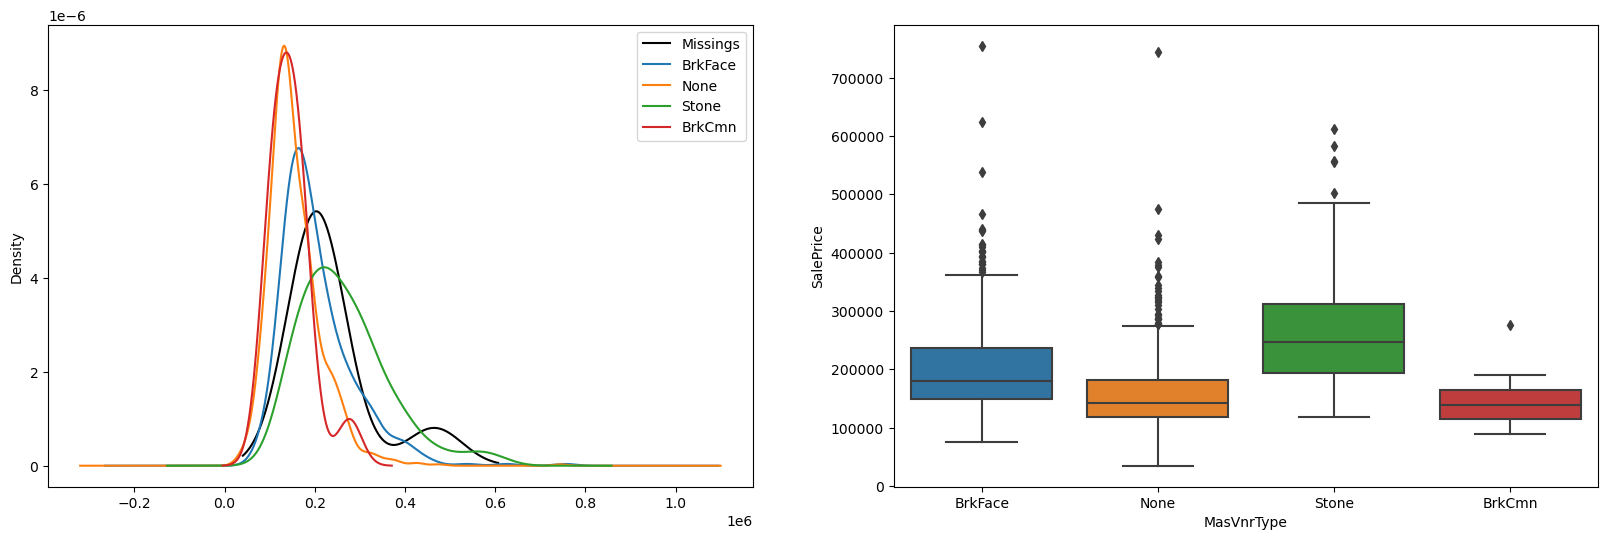

Column: BsmtQual


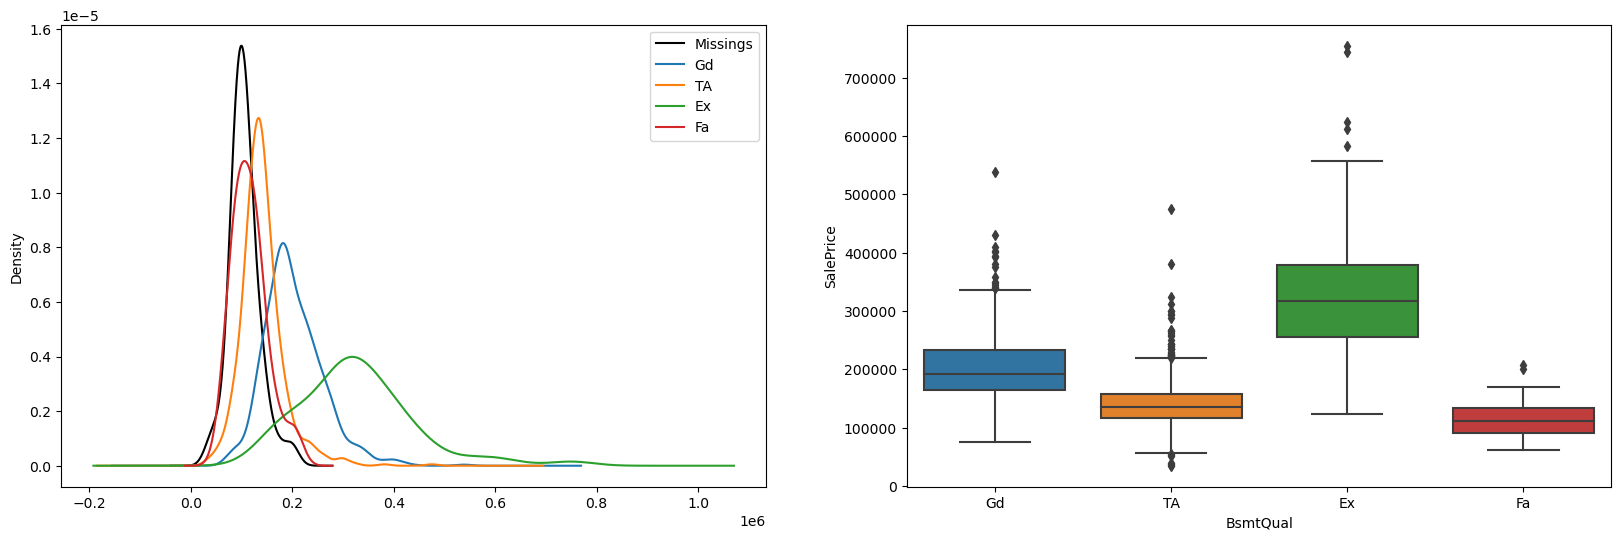

Column: BsmtCond


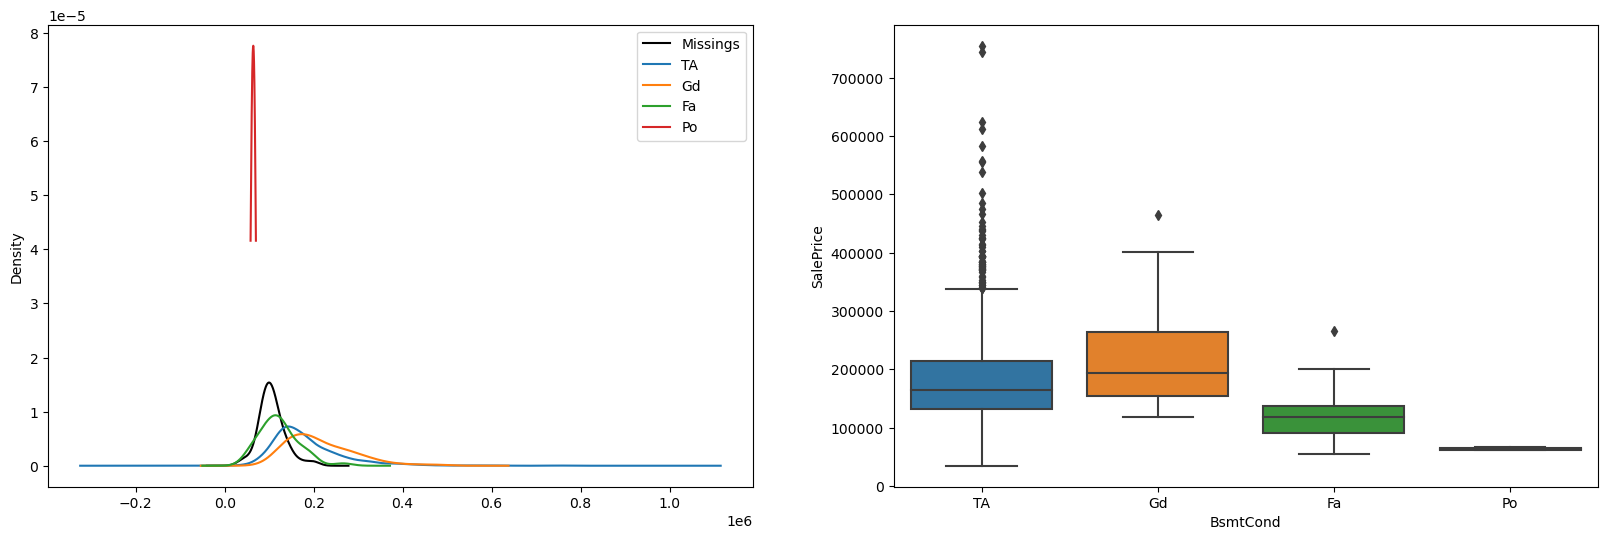

Column: BsmtExposure


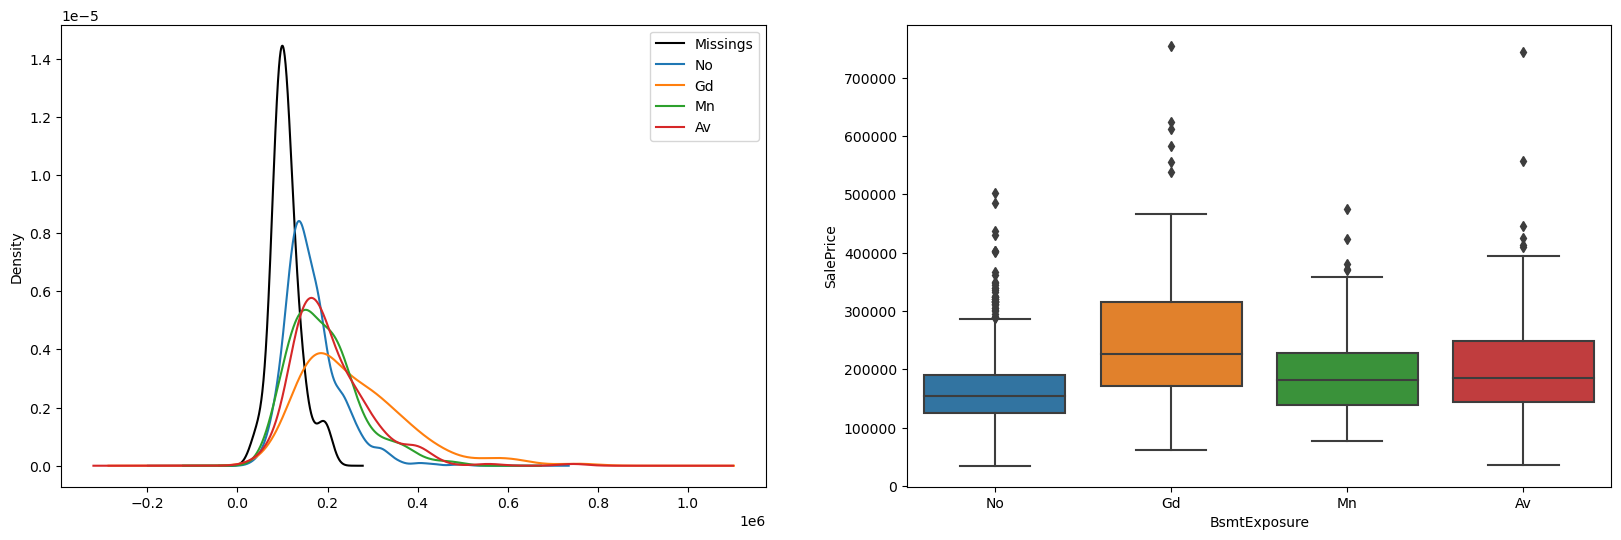

Column: BsmtFinType1


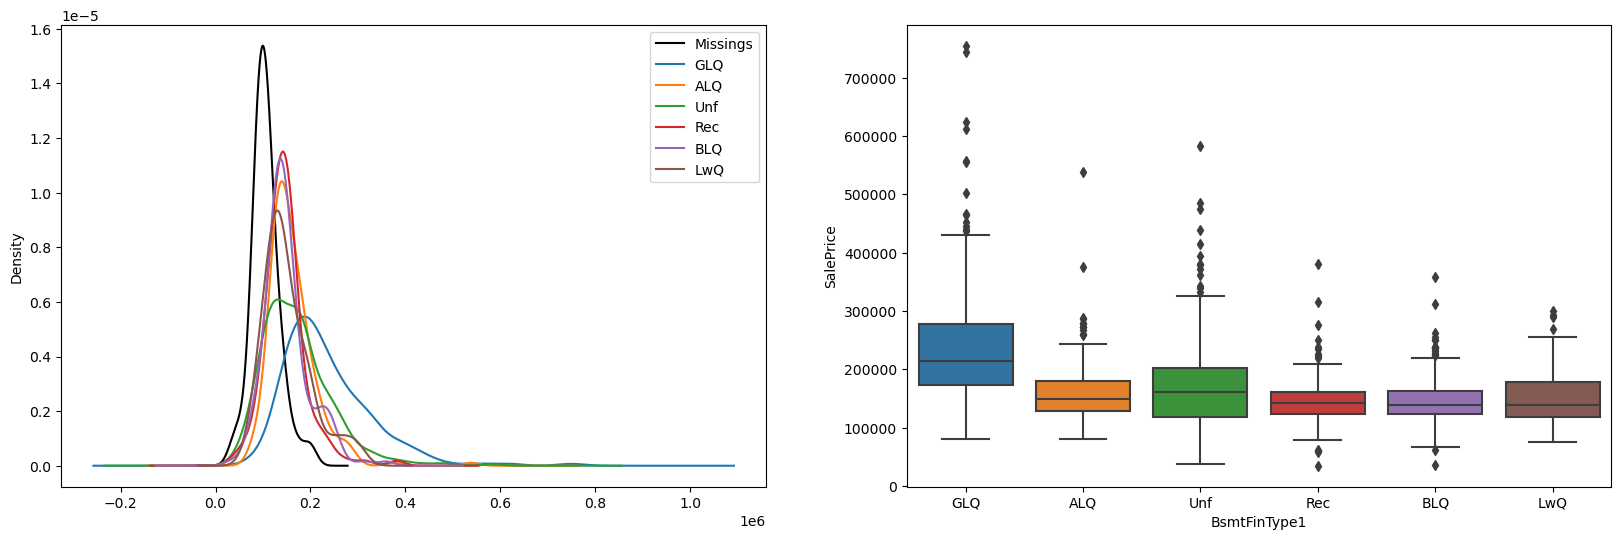

Column: BsmtFinType2


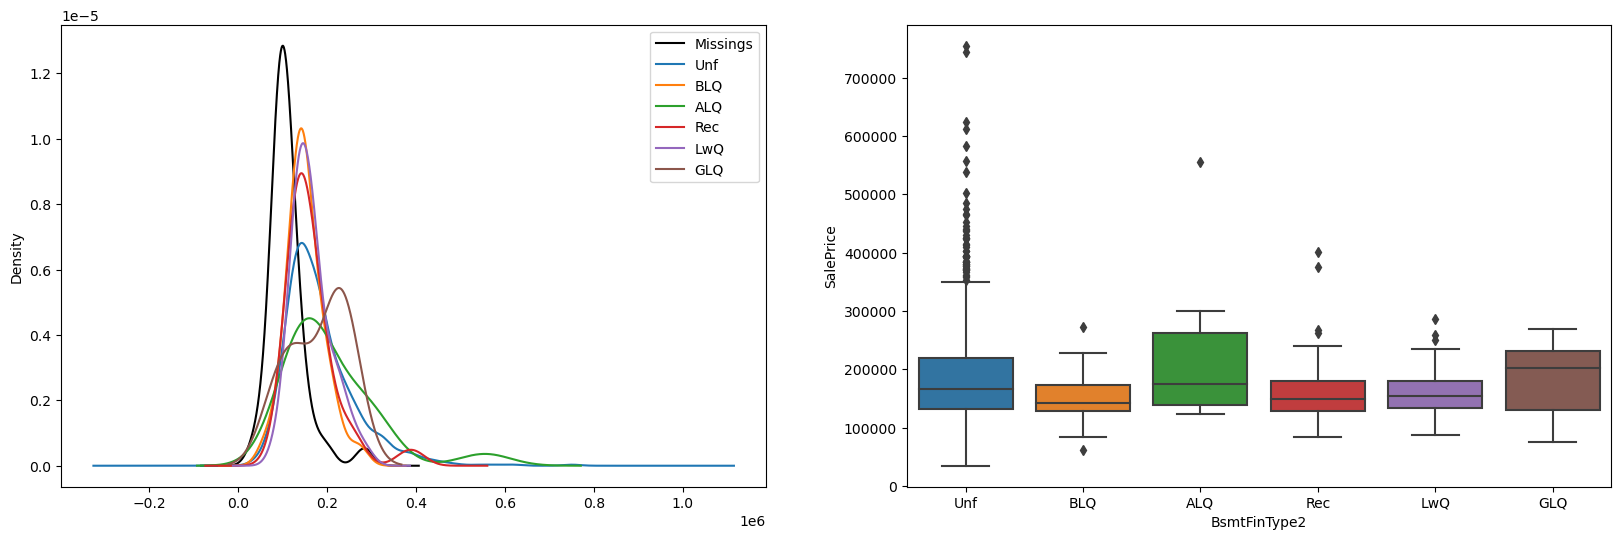

Column: GarageType


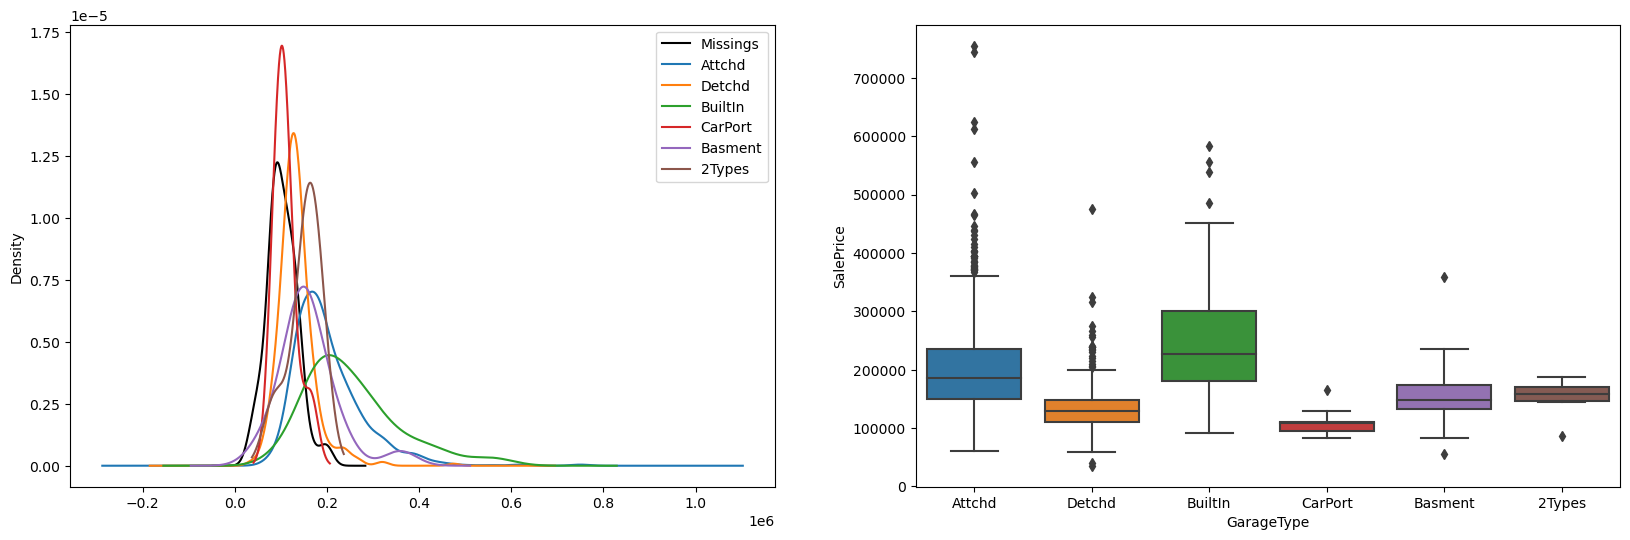

Column: GarageFinish


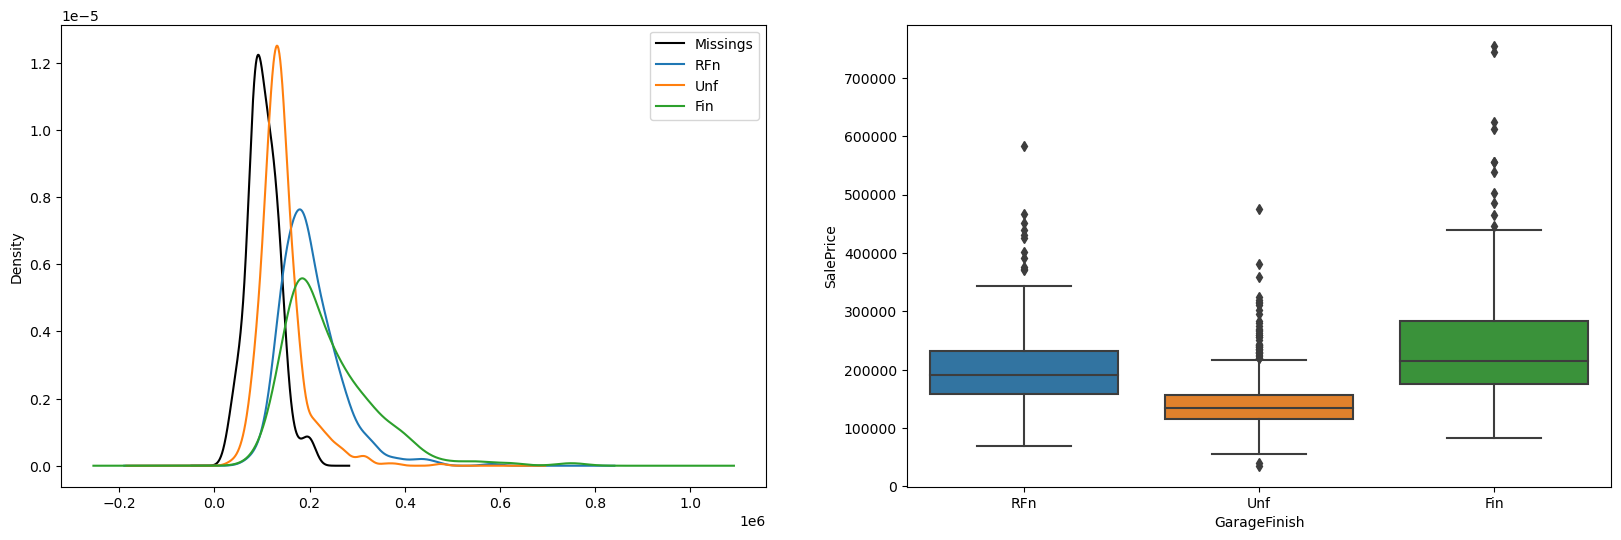

Column: GarageQual


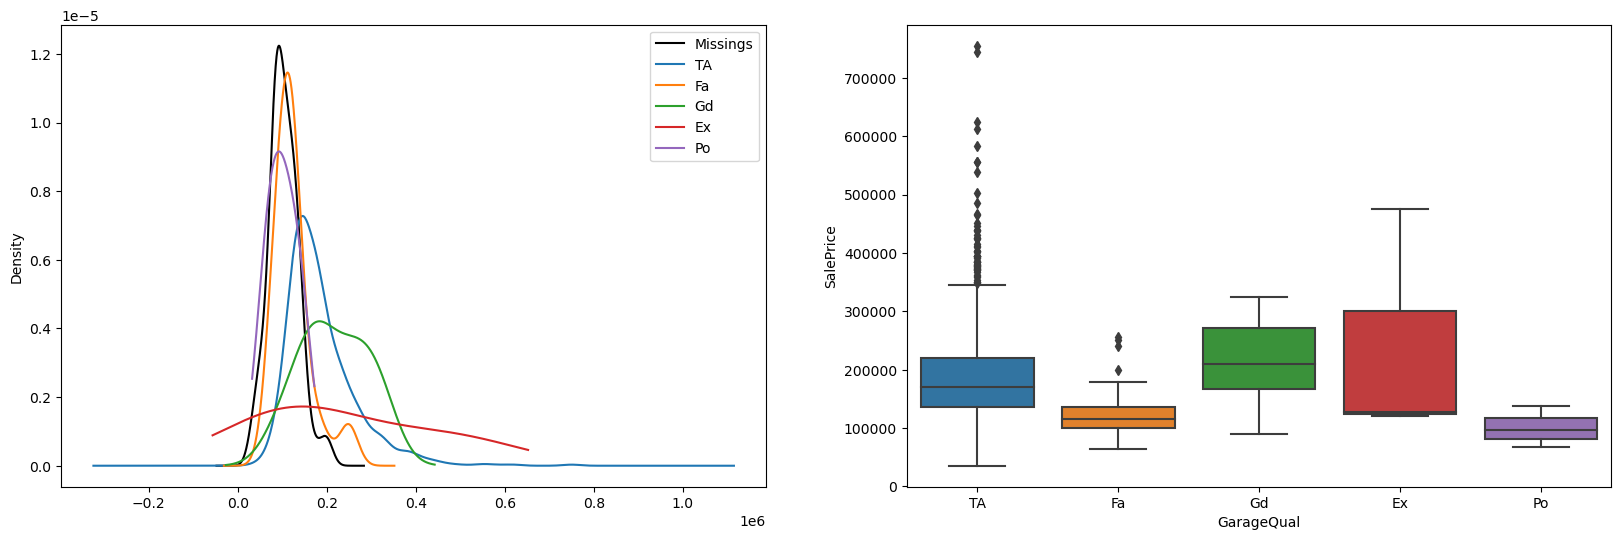

Column: GarageCond


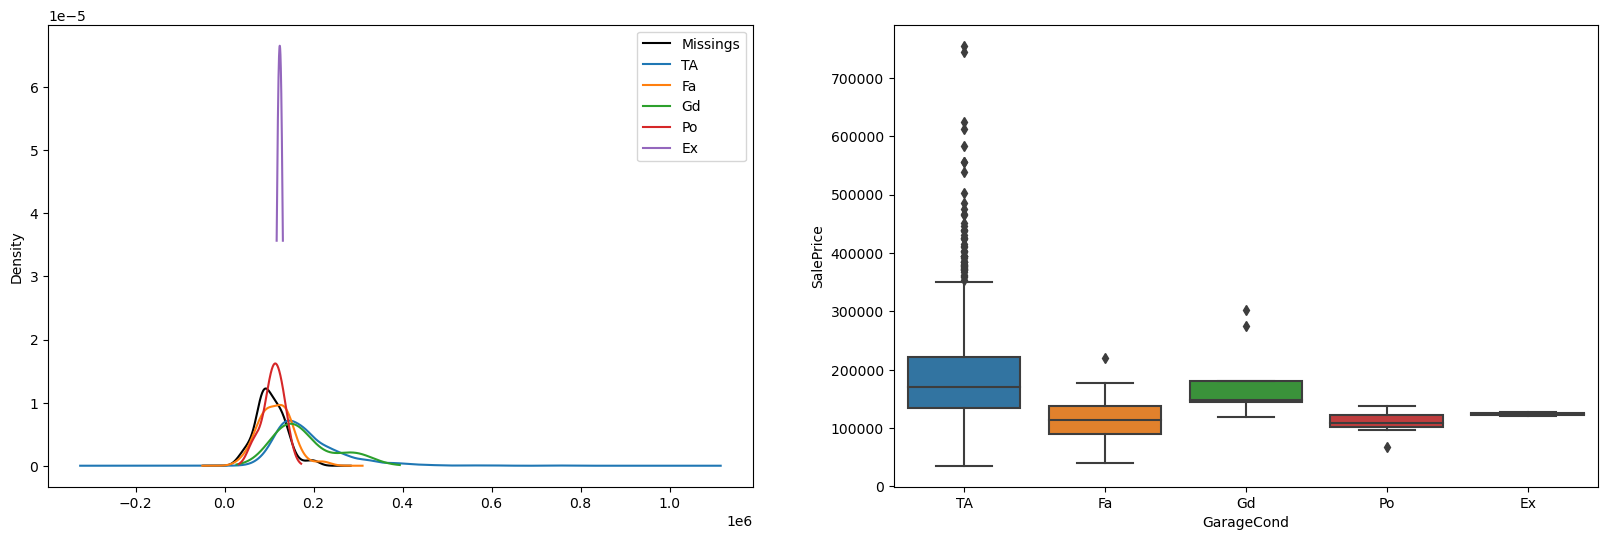

In [572]:
for col in cols_rescatables_cat:
    print(f'Column: {col}')
    fig = plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    dataHP[dataHP[col].isnull()]['SalePrice'].plot(kind="kde", color="black", label="Missings")
    for val in dataHP[col].dropna().unique():
        count = (dataHP[col]==val).sum()
        dataHP[dataHP[col] == val]['SalePrice'].plot(kind="kde", label=val)
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.boxplot(x=dataHP[col],y=dataHP['SalePrice'])
    plt.show()

In [573]:
#La imputacion se hace manualmente ya que el relleno de los NaN se hara en valores diferentes
#Se hace la imputacion de acuerdo a las graficas, las que mas se acerquen entre si a Missings, se hace la imputacion

dataHP['MasVnrType'].fillna('Stone',inplace=True)
dataHP['BsmtQual'].fillna('Fa',inplace=True)
dataHP['BsmtCond'].fillna('Fa',inplace=True)
dataHP['BsmtExposure'].fillna('No',inplace=True)
dataHP['BsmtFinType1'].fillna('Rec',inplace=True)
dataHP['BsmtFinType2'].fillna('BLQ',inplace=True)
dataHP['GarageType'].fillna('CarPort',inplace=True)
dataHP['GarageFinish'].fillna('Unf',inplace=True)
dataHP['GarageQual'].fillna('Fa',inplace=True)
dataHP['GarageCond'].fillna('Fa',inplace=True)


In [574]:
#Verificamos que ya no haya ningun NaN
cols_con_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()*100
prop_nan_per_col

Series([], dtype: float64)

### Codificacion de Variables Categoricas

In [575]:
def getCategoryVars(dataset):
    cat_colnames = []
    colnames = dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

#se creo una variable vacia, se buscto uno por uno el tipo de variable de cada columna y si es objeto o sea categorica entonces
#se almancena en la variable 

In [576]:
cat_cols=getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [577]:
dataset_categories = dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [578]:
dataset_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [579]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 234 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: uint8(234)
memory usage: 333.8 KB


In [580]:
#Tiene menos memoria pero eso no lo hace mas facil de procesar ya que tiene mas de 5 veces el numero de columnas.
#Elegimos Frecuency encoding debido al gran numero de columnas que ya tiene el dataset


### Frecuency encoding

In [581]:
for col in dataset_categories:

    print(f'-----------{col}---------')

    col_name= f'{col}_freq_mapper'

    col_name = (dataset_categories[col].value_counts().sort_values(ascending=False)).to_dict()

    print(col_name)

    col_code= f'{col}_code'

    dataHP[col_code]=dataset_categories[col].map(col_name)


-----------MSZoning---------
{'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10}
-----------Street---------
{'Pave': 1454, 'Grvl': 6}
-----------LotShape---------
{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
-----------LandContour---------
{'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}
-----------Utilities---------
{'AllPub': 1459, 'NoSeWa': 1}
-----------LotConfig---------
{'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4}
-----------LandSlope---------
{'Gtl': 1382, 'Mod': 65, 'Sev': 13}
-----------Neighborhood---------
{'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2}
-----------Condition1---------
{'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn

In [582]:
#Probando
dataHP[['LotShape_code','LotShape']]

,LotShape_code,LotShape
0,925,Reg
1,925,Reg
2,484,IR1
3,484,IR1
4,484,IR1
...,...,...
1455,925,Reg
1456,925,Reg
1457,925,Reg
1458,925,Reg


In [583]:
dataHP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 114 entries, Id to SaleCondition_code
dtypes: float64(3), int64(73), object(38)
memory usage: 1.3+ MB


In [584]:
dataHP.shape

(1460, 114)